# import-ы

In [ ]:
!pip install openfoamparser_mai
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for openfoamparser_mai: filename=openfoamparser_mai-0.14-py3-none-any.whl size=10070 sha256=4adf2163d5f3f8f7149bb72f78f7070d67ae7cb4cf21e95e6b67a6fc1ace0a51
  Stored in directory: /root/.cache/pip/wheels/e7/87/ab/152f3f7312bc7b75994a0fc94d58a1d0c45a4084fbf1947bee
Successfully built openfoamparser_mai
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 38.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import sys
import zipfile

In [ ]:
import openfoamparser_mai as Ofpp
import os
import numpy as np
import dgl
import networkx as nx
import torch
import matplotlib.pyplot as plt
from bokeh.palettes import Spectral

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# подклчение диска

In [ ]:
drive.mount('/content/drive',
            force_remount=True)

Mounted at /content/drive


# распаковка zip-файла

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/hack/data_wage.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/data')

# загрузка большой и мелкой сеток

In [ ]:
mesh_low = Ofpp.FoamMesh('/content/sample_data/data/data_wage/low_dim/vel3.0/')

In [ ]:
mesh_low.read_cell_centres('/content/drive/MyDrive/hack/C_kl_low')

In [ ]:
mesh_high = Ofpp.FoamMesh('/content/sample_data/data/data_wage/high_dim/vel3.0/')

In [ ]:
mesh_high.read_cell_centres('/content/drive/MyDrive/hack/C_kl_high')

# чтение всех данных и формирование графа

In [ ]:
data_V = None
res_V = None

In [ ]:
for i in sorted(os.listdir('/content/sample_data/data/data_wage/low_dim/')):
  for j in sorted(os.listdir('/content/sample_data/data/data_wage/low_dim/' + i)):
    if j not in ['constant', 'system', '0']:
      if data_V is not None:
        data_V = np.append(data_V, np.array([Ofpp.parse_internal_field('/content/sample_data/data/data_wage/low_dim/' + i + '/' + j + '/U')]), axis=0)
        res_V = np.append(res_V, np.array([Ofpp.parse_internal_field('/content/sample_data/data/data_wage/high_dim/' + i + '/' + j + '/U')]), axis=0)
      else:
        data_V = np.array([Ofpp.parse_internal_field('/content/sample_data/data/data_wage/low_dim/' + i + '/' + j + '/U')])
        res_V = np.array([Ofpp.parse_internal_field('/content/sample_data/data/data_wage/high_dim/' + i + '/' + j + '/U')])

In [ ]:
data_V.shape, res_V.shape

((1000, 75, 3), (1000, 4800, 3))

In [ ]:
#mesh.is_cell_on_boundary(1)

In [ ]:
V = [] #{i: list(filter(lambda x: 0 <= x <= 74, mesh.cell_neighbour_cells(i))) for i in range(75)}


for i in range(75):
  for j in list(filter(lambda x: 0 <= x <= 74, mesh_1.cell_neighbour_cells(i))):
    V.extend([(i, j)])

In [ ]:
V

[(0, 1),
 (0, 5),
 (1, 0),
 (1, 2),
 (1, 6),
 (2, 1),
 (2, 3),
 (2, 7),
 (3, 2),
 (3, 4),
 (3, 8),
 (4, 3),
 (4, 9),
 (4, 25),
 (5, 0),
 (5, 6),
 (5, 10),
 (6, 1),
 (6, 5),
 (6, 7),
 (6, 11),
 (7, 2),
 (7, 6),
 (7, 8),
 (7, 12),
 (8, 3),
 (8, 7),
 (8, 9),
 (8, 13),
 (9, 4),
 (9, 8),
 (9, 14),
 (9, 35),
 (10, 5),
 (10, 11),
 (10, 15),
 (11, 6),
 (11, 10),
 (11, 12),
 (11, 16),
 (12, 7),
 (12, 11),
 (12, 13),
 (12, 17),
 (13, 8),
 (13, 12),
 (13, 14),
 (13, 18),
 (14, 9),
 (14, 13),
 (14, 19),
 (14, 45),
 (15, 10),
 (15, 16),
 (15, 20),
 (16, 11),
 (16, 15),
 (16, 17),
 (16, 21),
 (17, 12),
 (17, 16),
 (17, 18),
 (17, 22),
 (18, 13),
 (18, 17),
 (18, 19),
 (18, 23),
 (19, 14),
 (19, 18),
 (19, 24),
 (19, 55),
 (20, 15),
 (20, 21),
 (21, 16),
 (21, 20),
 (21, 22),
 (22, 17),
 (22, 21),
 (22, 23),
 (23, 18),
 (23, 22),
 (23, 24),
 (24, 19),
 (24, 23),
 (24, 65),
 (25, 4),
 (25, 26),
 (25, 35),
 (26, 25),
 (26, 27),
 (26, 36),
 (27, 26),
 (27, 28),
 (27, 37),
 (28, 27),
 (28, 29),
 (28, 38)

In [ ]:
g = dgl.graph(V)

In [ ]:
G = nx.Graph()

In [ ]:
G.add_edges_from(V)

# попытка в графики

In [ ]:
true_pos = mesh_low.cell_centres

In [ ]:
true_pos2D = true_pos[:,0:2]

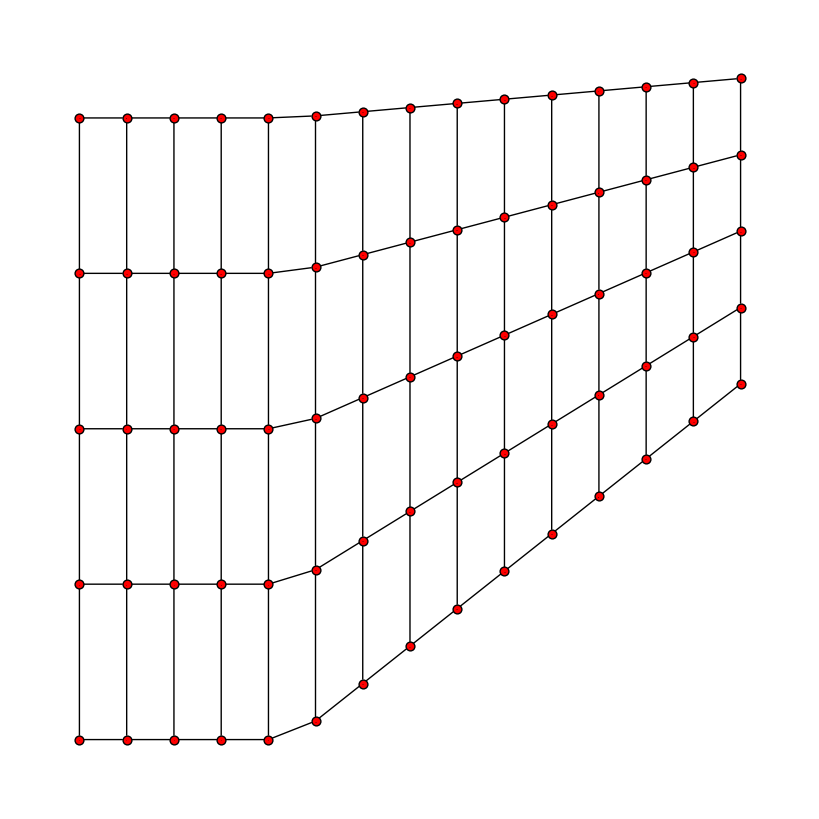

In [ ]:
plt.figure(figsize=(8, 8))

pos = true_pos2D

options = {
    'node_color': 'red',
    'node_size': 40,
    'width': 1,
    'arrowsize': 40,
    'font_size': 0,
}

nx.draw(G, pos=true_pos2D, with_labels = True, arrows=True, **options)

ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")

In [ ]:
#for i, xy in enumerate(true_pos2D):
#    plt.scatter(xy[0], xy[1], color=(alp[i],0,1-alp[i]))
#plt.plot()

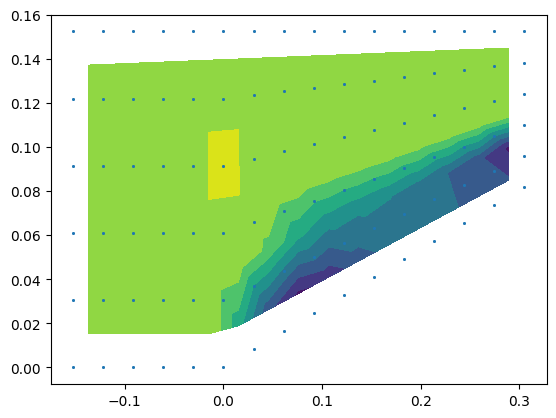

In [ ]:
plt.plot(mesh_1.points[:,0], mesh_1.points[:,1], 'o', markersize=1)
plt.tricontourf(true_pos2D[:,0], true_pos2D[:,1], data_V[1, :, 0])
plt.show()

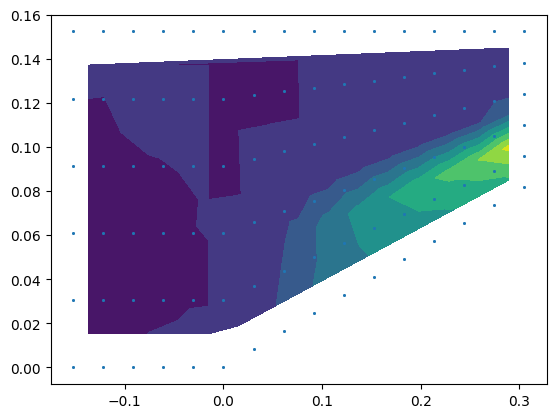

In [ ]:
plt.plot(mesh_1.points[:,0], mesh_1.points[:,1], 'o', markersize=1)
plt.tricontourf(true_pos2D[:,0], true_pos2D[:,1], data_V[1, :, 1])
plt.show()

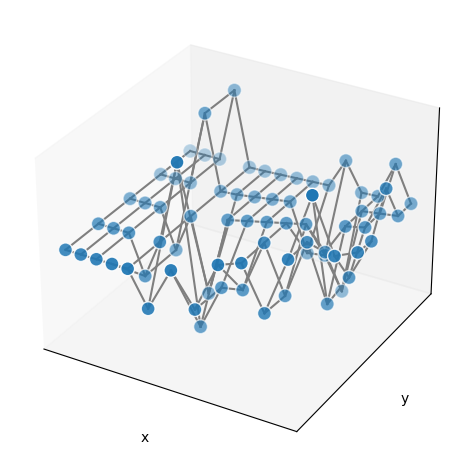

In [ ]:

pos = true_pos

# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()

In [ ]:
mesh_high = Ofpp.FoamMesh('/content/sample_data/data/data_wage/high_dim/vel3.0/')

In [ ]:
mesh_high.read_cell_centres('/content/drive/MyDrive/hack/C_kl_high')

In [ ]:
n_big = []#{i: list(filter(lambda x: 0 <= x <= 4799, mesh_big.cell_neighbour_cells(i))) for i in range(4800)}

for i in range(4800):
  for j in list(filter(lambda x: 0 <= x <= 4799, mesh_high.cell_neighbour_cells(i))):
    n_big.append((i, j))

In [ ]:
G = nx.Graph()

In [ ]:
G.add_edges_from(n_big)

In [ ]:
true_pos2D_high = mesh_high.cell_centres[:,:2]

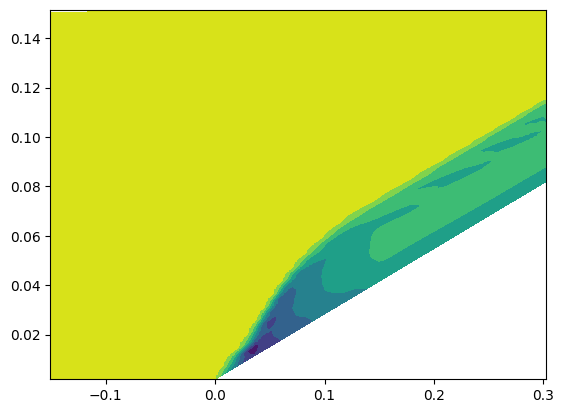

In [ ]:
#plt.plot(mesh_high.points[:,0], mesh_high.points[:,1], 'o', markersize=0.2)
plt.tricontourf(true_pos2D_high[:,0], true_pos2D_high[:,1], res_V[1, :, 0])
plt.show()

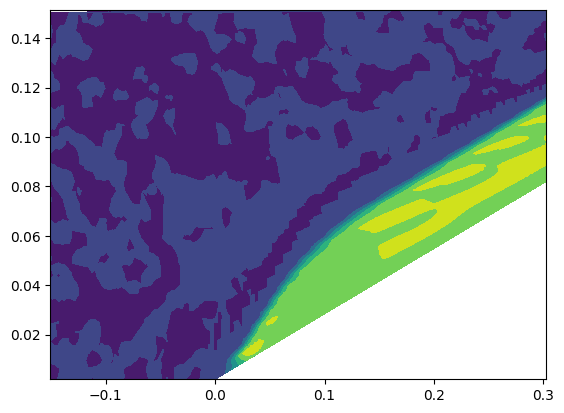

In [ ]:
#plt.plot(mesh_high.points[:,0], mesh_high.points[:,1], 'o', markersize=0.2)
plt.tricontourf(true_pos2D_high[:,0], true_pos2D_high[:,1], res_V[1, :, 1])
plt.show()

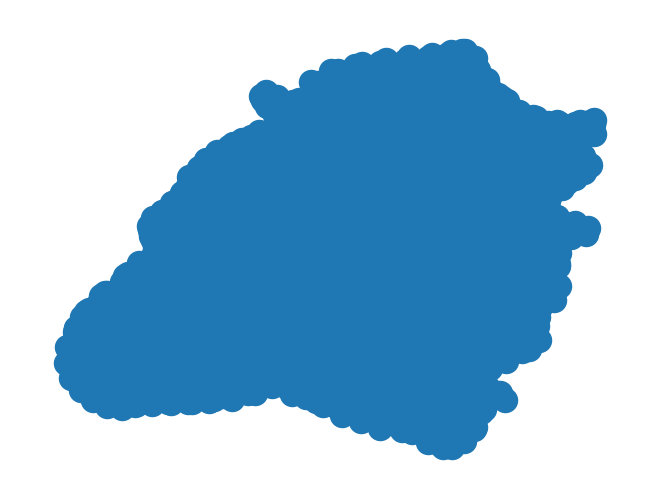

In [ ]:
nx.draw(G)

In [ ]:
idx = 45

[]

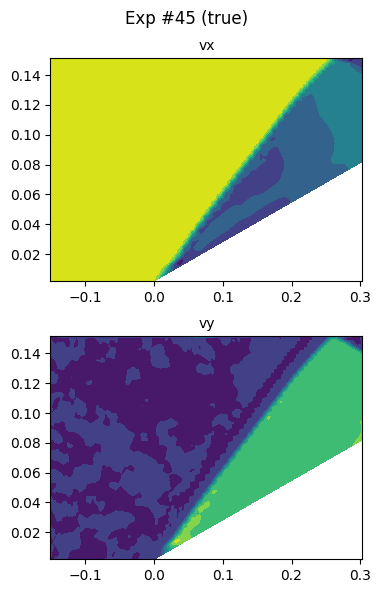

In [ ]:
#plt.plot(mesh_high.points[:,0], mesh_high.points[:,1], 'o', markersize=1)

fig, axes = plt.subplots(2, 1)
fig.set_figheight(6)
fig.set_figwidth(4)

for i in range(2):
    axes[i].tricontourf(mesh_high.cell_centres[:,0],
                          mesh_high.cell_centres[:,1],
                          res_V[idx, :, i])
    axes[i].set_title("vx" if i == 0 else "vy", fontsize=10)
fig.tight_layout()
fig.suptitle(f'Exp #{idx} (true)', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.plot()

# визуализация

In [ ]:
#dt = np.dtype([('vx', float), ('vy', float), ('vz', float)])
wage_res = np.loadtxt('/content/drive/MyDrive/hack/markers.txt')

In [ ]:
true_pos = mesh_high.cell_centres

In [ ]:
part_len = 4800
exp_num = 100

In [ ]:
len(wage_res)

480000

In [ ]:
idx = 45

[]

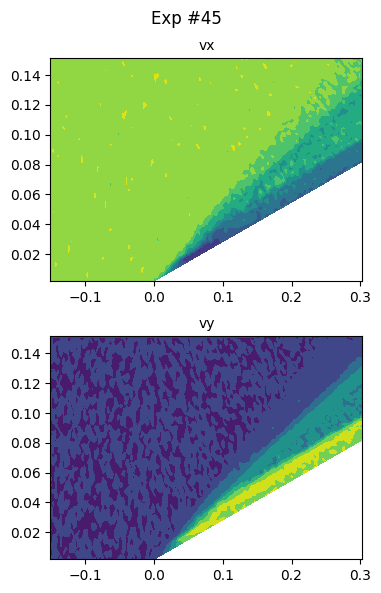

In [ ]:
#plt.plot(mesh_high.points[:,0], mesh_high.points[:,1], 'o', markersize=1)

fig, axes = plt.subplots(2, 1)
fig.set_figheight(6)
fig.set_figwidth(4)

for i in range(2):
    axes[i].tricontourf(mesh_high.cell_centres[:,0],
                          mesh_high.cell_centres[:,1],
                          wage_res[idx*part_len:(idx+1)*part_len,i])
    axes[i].set_title("vx" if i == 0 else "vy", fontsize=10)
fig.tight_layout()
fig.suptitle(f'Exp #{idx}', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.plot()

In [ ]:
#plt.plot(mesh_high.points[:,0], mesh_high.points[:,1], 'o', markersize=1)

fig, axes = plt.subplots(2, 1)
fig.set_figheight(6)
fig.set_figwidth(4)
idx=0
for i in range(2):
    rng = max(wage_res[idx*part_len:(idx+1)*part_len,i]) - min(wage_res[idx*part_len:(idx+1)*part_len,i])
    shft = min(wage_res[idx*part_len:(idx+1)*part_len,i])
    val = (wage_res[idx*part_len:(idx+1)*part_len,i] - shft) / rng
    for j, xyz in enumerate(mesh_high.cell_centres):
        axes[i].scatter(xyz[0], xyz[1], c=(val[j], 0, 1-val[j]), s=0.1)
    #axes[i].tricontourf(mesh_high.cell_centres[:,0],
    #                      mesh_high.cell_centres[:,1],
    #                      wage_res[idx*part_len:(idx+1)*part_len,i])
    axes[i].set_title("vx" if i == 0 else "vy", fontsize=10)
fig.tight_layout()
fig.suptitle(f'Exp #{idx}', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.plot()

<ipython-input-189-2f324b1213f9>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[i].scatter(xyz[0], xyz[1], c=(val[j], 0, 1-val[j]), s=0.1)


# визуализация2

In [ ]:
#dt = np.dtype([('vx', float), ('vy', float), ('vz', float)])
wage_res_2 = np.loadtxt('/content/drive/MyDrive/hack/markers2.txt')

In [ ]:
mesh_high = Ofpp.FoamMesh('/content/sample_data/data/data_wage/high_dim/vel3.0/')

In [ ]:
mesh_high.read_cell_centres('/content/drive/MyDrive/hack/C_kl_high')

In [ ]:
true_pos = mesh_high.cell_centres

In [ ]:
part_len = 4800
exp_num = 100

In [ ]:
len(wage_res)

480000

In [ ]:
len(wage_res[idx*part_len:(idx+1)*part_len])

4800

In [ ]:
idx = 0

[]

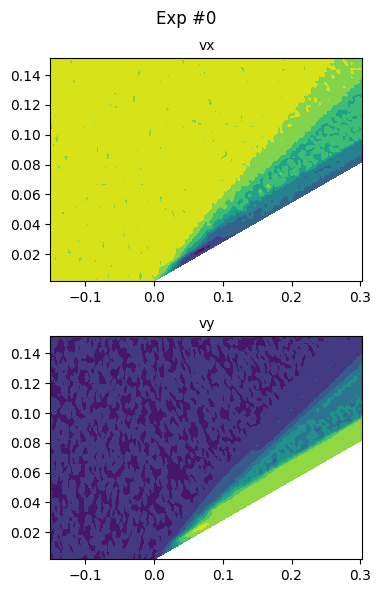

In [ ]:
#plt.plot(mesh_high.points[:,0], mesh_high.points[:,1], 'o', markersize=1)

fig, axes = plt.subplots(2, 1)
fig.set_figheight(6)
fig.set_figwidth(4)

for i in range(2):
    axes[i].tricontourf(mesh_high.cell_centres[:,0],
                          mesh_high.cell_centres[:,1],
                          wage_res[idx*part_len:(idx+1)*part_len,i])
    axes[i].set_title("vx" if i == 0 else "vy", fontsize=10)
fig.tight_layout()
fig.suptitle(f'Exp #{idx}', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.plot()

# ступенька (не успели)

## распаковка zip-файла

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/hack/data_step.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/data')

 ## загрузка большой и мелкой сеток

In [ ]:
step_mesh_low = Ofpp.FoamMesh('/content/sample_data/data/data_step/low_dim/vel1.0/')

In [ ]:
step_mesh_low.read_cell_centres('/content/drive/MyDrive/hack/C_step_low')

In [ ]:
step_mesh_high = Ofpp.FoamMesh('/content/sample_data/data/data_step/high_dim/vel1.0/')

In [ ]:
step_mesh_high.read_cell_centres('/content/drive/MyDrive/hack/C_step_high')

In [ ]:
step_data_V = None
step_res_V = None

In [ ]:
for i in sorted(os.listdir('/content/sample_data/data/data_step/low_dim/')):
  for j in sorted(os.listdir('/content/sample_data/data/data_step/low_dim/' + i)):
    if j not in ['constant', 'system', '0']:
      if step_data_V is not None:
        step_data_V = np.append(step_data_V, np.array([Ofpp.parse_internal_field('/content/sample_data/data/data_step/low_dim/' + i + '/' + j + '/U')]), axis=0)
        step_res_V = np.append(step_res_V, np.array([Ofpp.parse_internal_field('/content/sample_data/data/data_step/high_dim/' + i + '/' + j + '/U')]), axis=0)
      else:
        step_data_V = np.array([Ofpp.parse_internal_field('/content/sample_data/data/data_step/low_dim/' + i + '/' + j + '/U')])
        step_res_V = np.array([Ofpp.parse_internal_field('/content/sample_data/data/data_step/high_dim/' + i + '/' + j + '/U')])

In [ ]:
step_data_V.shape, step_res_V.shape

((1000, 640, 3), (1000, 16128, 3))

In [ ]:
#mesh.is_cell_on_boundary(1)

In [ ]:
step_V = [] #{i: list(filter(lambda x: 0 <= x <= 74, mesh.cell_neighbour_cells(i))) for i in range(75)}


for i in range(640):
  for j in list(filter(lambda x: 0 <= x <= 640, step_mesh_low.cell_neighbour_cells(i))):
    step_V.extend([(i, j)])

In [ ]:
len(step_mesh_low.cell_centres)

640

In [ ]:
step_V

In [ ]:
step_g = dgl.graph(step_V)

In [ ]:
step_G = nx.Graph()

In [ ]:
step_G.add_edges_from(step_V)

## проверка топологии

In [ ]:
step_true_pos = step_mesh_low.cell_centres

In [ ]:
step_true_pos2D = step_true_pos[:,0:2]

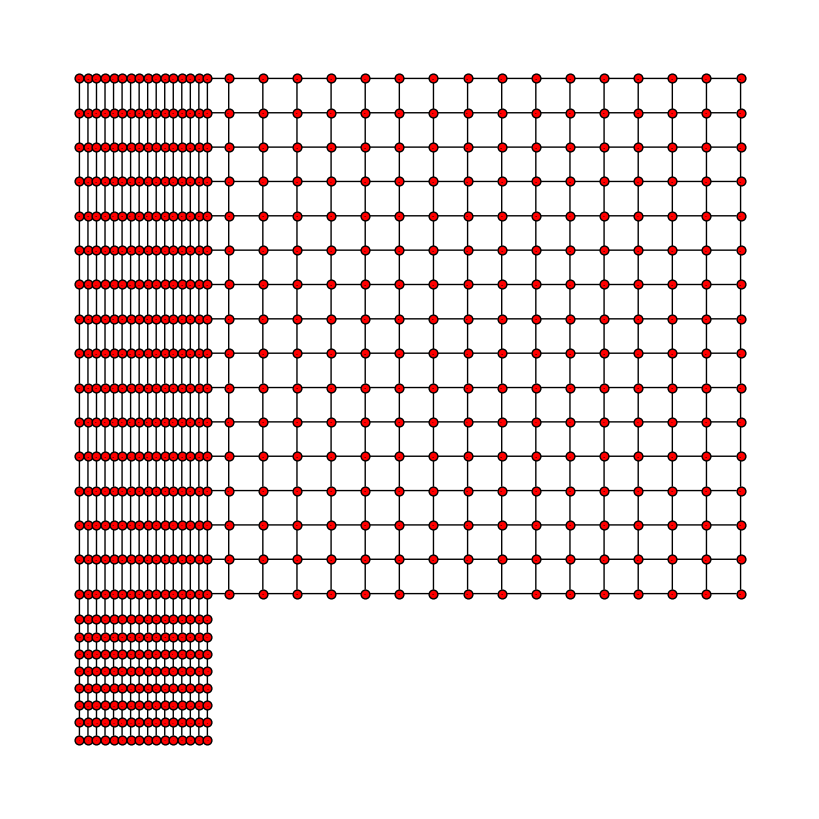

In [ ]:
plt.figure(figsize=(8, 8))

options = {
    'node_color': 'red',
    'node_size': 40,
    'width': 1,
    'arrowsize': 40,
    'font_size': 0,
}

nx.draw(step_G, pos=step_true_pos2D, with_labels = True, arrows=True, **options)

ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")

In [ ]:
len(step_mesh_high.cell_centres)

16128

In [ ]:
step_high_V = [] #{i: list(filter(lambda x: 0 <= x <= 74, mesh.cell_neighbour_cells(i))) for i in range(75)}


for i in range(16128):
  for j in list(filter(lambda x: 0 <= x <= 16127, step_mesh_high.cell_neighbour_cells(i))):
    step_high_V.extend([(i, j)])

In [ ]:
step_high_G = nx.Graph()

In [ ]:
step_high_G.add_edges_from(step_high_V)

In [ ]:
step_high_true_pos = step_mesh_high.cell_centres

In [ ]:
step_high_true_pos2D = step_high_true_pos[:,0:2]

In [ ]:
plt.figure(figsize=(8, 8))

options = {
    'node_color': 'red',
    'node_size': 40,
    'width': 1,
    'arrowsize': 40,
    'font_size': 0,
}

nx.draw(step_high_G, pos=step_high_true_pos2D, with_labels = True, arrows=True, **options)

ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")

Error in callback <function flush_figures at 0x7fccee9b5a60> (for post_execute):


KeyboardInterrupt: ignored

## графики

{b'inlet': Boundary(type=b'patch', num=24, start=1224, id=-10),
 b'outlet': Boundary(type=b'patch', num=16, start=1248, id=-11),
 b'bottom': Boundary(type=b'symmetryPlane', num=16, start=1264, id=-12),
 b'top': Boundary(type=b'symmetryPlane', num=32, start=1280, id=-13),
 b'obstacle': Boundary(type=b'patch', num=24, start=1312, id=-14),
 b'defaultFaces': Boundary(type=b'empty', num=1280, start=1336, id=-15)}

In [ ]:
idx = 1

[]

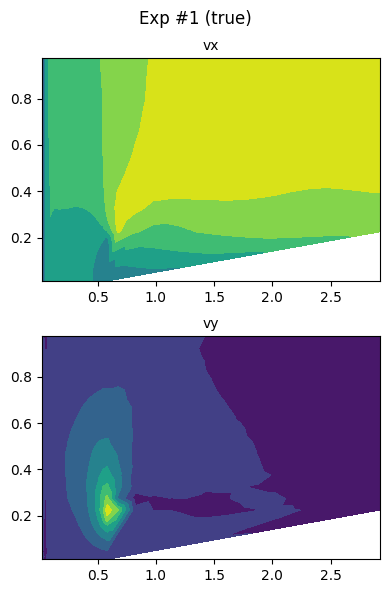

In [ ]:
#plt.plot(mesh_high.points[:,0], mesh_high.points[:,1], 'o', markersize=10**(-5))

fig, axes = plt.subplots(2, 1)
fig.set_figheight(6)
fig.set_figwidth(4)
#axes[0].plot(step_mesh_low.cell_centres[:,0], step_mesh_low.cell_centres[:,1], 'o')
#axes[1].plot(step_mesh_low.cell_centres[:,0], step_mesh_low.cell_centres[:,1], 'o') #, markersize=10**(-5)

for i in range(2):
    axes[i].tricontourf(step_mesh_low.cell_centres[:,0], step_mesh_low.cell_centres[:,1],
                          step_data_V[idx, :, i])
    axes[i].set_title("vx" if i == 0 else "vy", fontsize=10)
fig.tight_layout()
fig.suptitle(f'Exp #{idx} (true)', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.plot()